<a href="https://colab.research.google.com/github/danoffn/100-Days-Of-ML-Code/blob/master/Trabajo_Grupal_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTEGRANTES DEL GRUPO:

### Nombre 1: Daniel Flores
### Nombre 2: Ignacio Alonso García Aedo
### Nombre 3: Javier Rivera Herrera
### Nombre 4: Juan Pablo Romero
### Nombre 5: Ximena Torres Zamora

# Indicaciones

## A. Objetivos de la tarea

El objetivo de esta tarea es desarrollar y aplicar un modelo de regresión para predecir la temperatura de una ciudad europea, basándose en distintos parámetros climáticos.

## B. Prerrequisitos para desarrollar la tarea

Antes de trabajar en esta tarea deben haber comprendido los contenidos de la unidad de sobre algoritmos de aprendizaje supervisado, especialmente la temática sobre regresión lineal y árboles de decisión.

## C. Instrucciones para la elaboración de la tarea

REQUISITOS GENERALES

Cumpla con lo indicado en cada sección. No se pide nada adicional a lo que se indica. Cualquier decisión debe estar justificada y fundamentada, no se considerará completamente correcto una decisión que no esté justificada.

## D. Librerías a utilizar

Las librerías y modelos con los que pueden trabajar son los siguientes:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import missingno as msngo
import warnings

from IPython.display import display, Markdown

warnings.filterwarnings('ignore')

## E. Descripción del set de datos

El archivo CSV 'historia_climatica' contiene un resumen por hora y día para una ciudad europea. </p>

Los datos disponibles son: </p>

**Fecha:** Representa el momento en el que se tomó la muestra, con información sobre la fecha y la hora. </br>
**summary (resumen):** Descripción general del estado del tiempo en ese momento.</br>
**precipType (tipo de precipitación):** Indica el tipo de precipitación (por ejemplo, lluvia, nieve o granizo).</br>
**temperature (temperatura):** La temperatura en grados Celsius durante esa hora.</br>
**humidity (humedad):** Porcentaje de humedad en el ambiente.</br>
**windSpeed (velocidad del viento):** Velocidad del viento en ese momento, generalmente medida en kilómetros por hora (km/h) o metros por segundo (m/s).</br>
**windBearing (dirección del viento):** Dirección desde la cual sopla el viento, medida en grados desde el norte verdadero.</br>
**visibility (visibilidad):** La distancia horizontal a la cual se puede ver claramente un objeto, medida en kilómetros.</br>
**loudCover (cobertura de nubes):** Indica la proporción de cielo cubierto por nubes en ese momento, generalmente expresado como un porcentaje.</br>
**pressure (presión):** La presión atmosférica en ese momento, medida en hectopascales (hPa) o milibares (mbar).</br>
**dailySummary (resumen diario):** Descripción general del estado del tiempo durante el día.

In [ ]:
df = pd.read_csv('https://github.com/danoffn/diplomado-ia-uautonoma2024/blob/main/historia_climatica.csv?raw=true')
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Fecha
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00


# Parte I - Exploración de Datos

# I.A. Inspección y Gestión de Datos Faltantes

Inspeccione si existen datos faltantes. En caso de que existan, realice una estrategia para gestionar estos datos. Puede encontrar útil la función fillna de pandas. Justifique su estrategia para cada columna con datos faltantes.

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Fecha
22211,Mostly Cloudy,rain,25.016667,0.54,9.1609,45.0,10.3523,0.0,1015.62,Partly cloudy starting in the morning.,2008-06-02 11:00:00
10626,Foggy,snow,-3.938889,0.92,0.1288,180.0,2.9785,0.0,1033.28,Foggy starting overnight continuing until even...,2007-12-23 18:00:00
21996,Partly Cloudy,rain,27.244444,0.51,3.8318,208.0,11.2056,0.0,1014.83,Partly cloudy starting overnight continuing un...,2008-06-11 12:00:00
31992,Mostly Cloudy,rain,8.333333,0.89,14.4900,320.0,15.1340,0.0,1020.00,Mostly cloudy throughout the day.,2009-03-31 01:00:00
72344,Overcast,rain,3.866667,0.89,22.0409,21.0,9.9820,0.0,1017.49,Foggy until morning.,2014-12-09 08:00:00
29233,Foggy,snow,-10.677778,0.91,3.4454,331.0,2.0608,0.0,1037.31,Foggy until morning.,2009-01-10 01:00:00
32632,Partly Cloudy,rain,23.838889,0.52,19.8996,329.0,11.4471,0.0,1017.35,Partly cloudy throughout the day.,2009-05-27 17:00:00
26833,Mostly Cloudy,rain,13.333333,0.49,11.2700,140.0,16.1000,0.0,1010.70,Mostly cloudy throughout the day.,2009-04-29 01:00:00
11852,Clear,rain,2.266667,0.91,7.2128,194.0,8.0500,0.0,1026.30,Partly cloudy starting in the morning continui...,2007-01-16 20:00:00
86268,Overcast,rain,11.938889,0.93,16.1966,31.0,3.2361,0.0,1004.95,Foggy in the morning.,2015-10-11 16:00:00


#### Información de columnas, datos no nulos y tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Summary                 96453 non-null  object 
 1   Precip Type             94981 non-null  object 
 2   Temperature (C)         96453 non-null  float64
 3   Humidity                96453 non-null  float64
 4   Wind Speed (km/h)       94352 non-null  float64
 5   Wind Bearing (degrees)  96453 non-null  float64
 6   Visibility (km)         96453 non-null  float64
 7   Loud Cover              96453 non-null  float64
 8   Pressure (millibars)    96281 non-null  float64
 9   Daily Summary           96453 non-null  object 
 10  Fecha                   96453 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.1+ MB


None

#### Información de datos nulos por columna

Summary                      0
Precip Type               1472
Temperature (C)              0
Humidity                     0
Wind Speed (km/h)         2101
Wind Bearing (degrees)       0
Visibility (km)              0
Loud Cover                   0
Pressure (millibars)       172
Daily Summary                0
Fecha                        0
dtype: int64

El porcentaje de datos nulos es 0.4%

#### Ubicación de registros nulos

<Axes: >

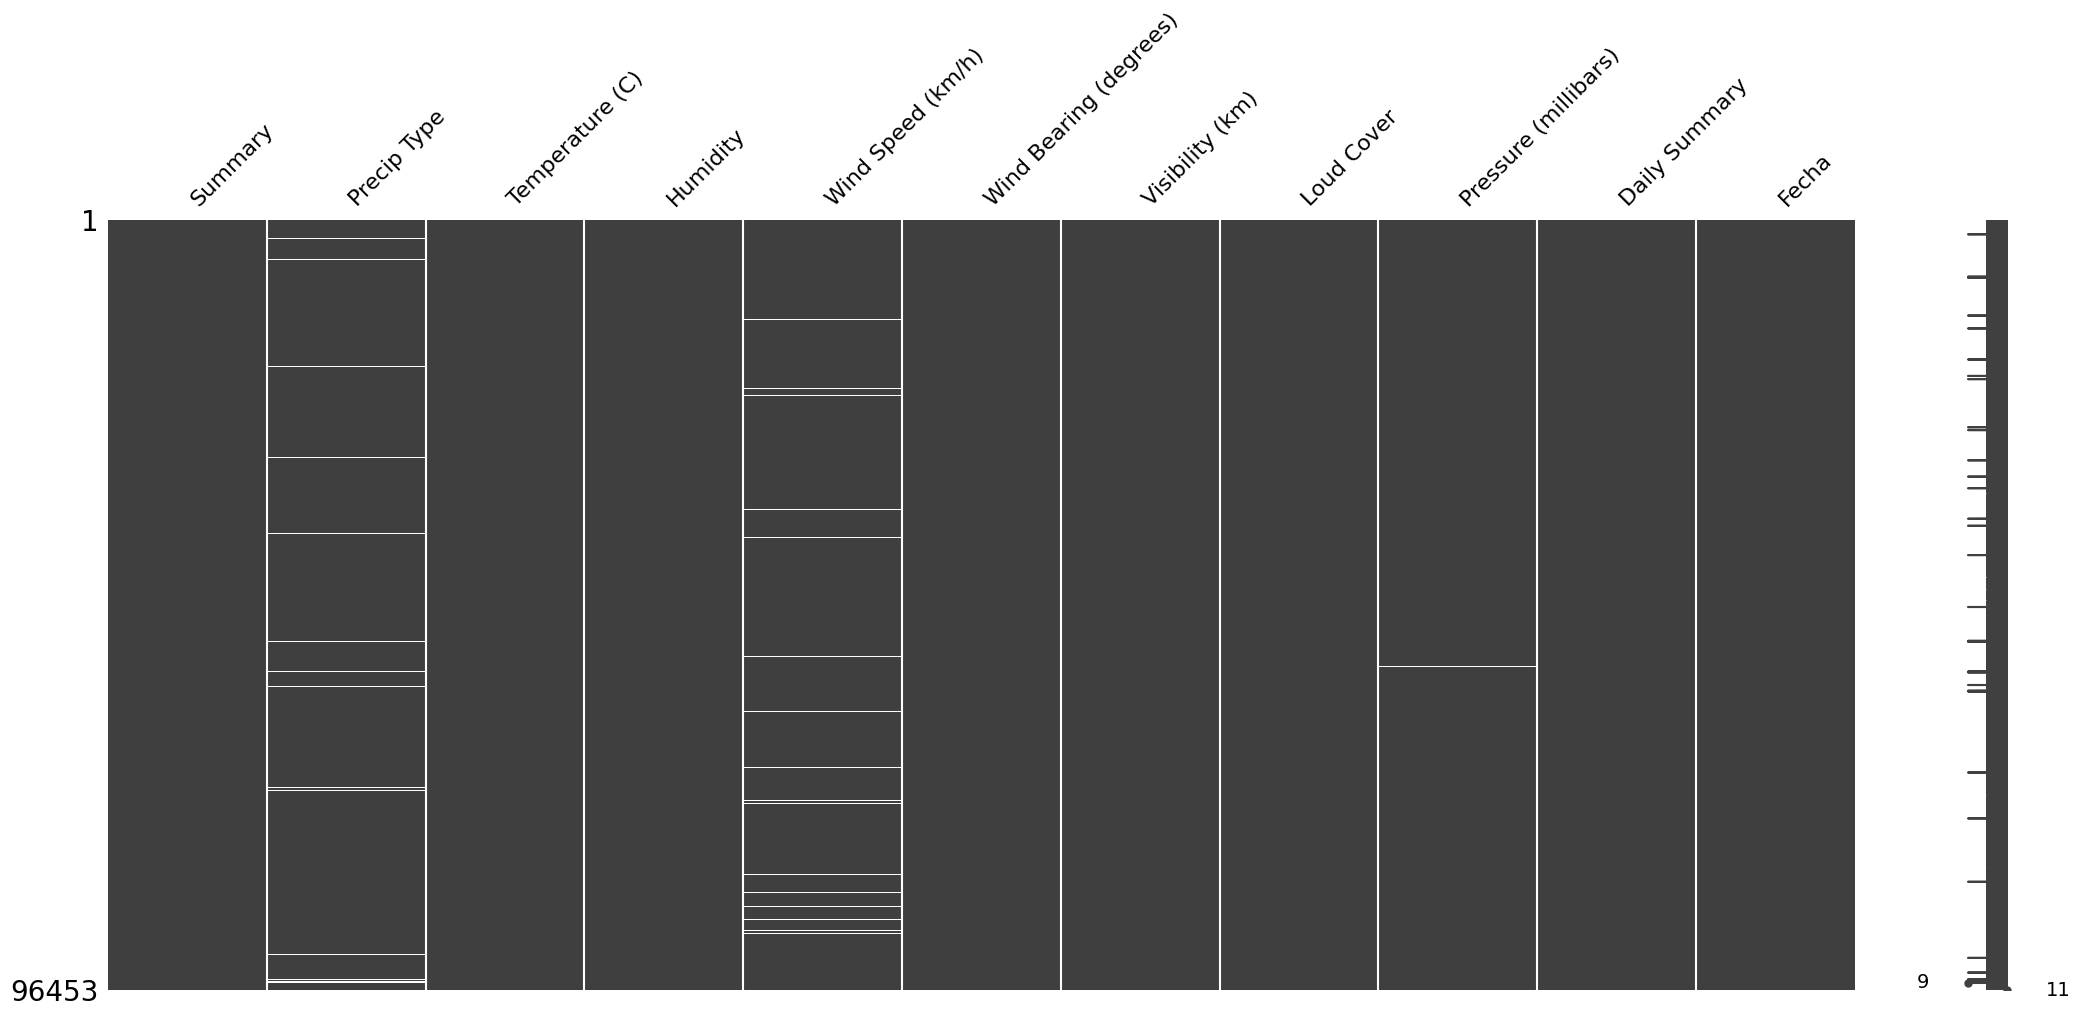

In [ ]:
# Mostrar algunas muestras del dataframe
display(df.sample(20))

# @title
display(Markdown("#### Información de columnas, datos no nulos y tipo"))
display(df.info())



# Datos nulos

display(Markdown("#### Información de datos nulos por columna"))

display(df.isnull().sum())

num_datos_nulos = df.isnull().sum().sum()
num_datos_totales = df.shape[0]*df.shape[1]
porc_datos_perdidos = round(num_datos_nulos/num_datos_totales * 100, 1)

display(
    Markdown(f"El porcentaje de datos nulos es {str(porc_datos_perdidos)}%"))

display(Markdown("#### Ubicación de registros nulos"))
msngo.matrix(df)

Se ve que los campos **Precip Type**, **Wind Speed** y **Pressure** tienen datos faltantes. A continuación se presenta el tratamiento de datos faltantes para las tres columnas.

## Wind Speed

<Axes: ylabel='Frequency'>

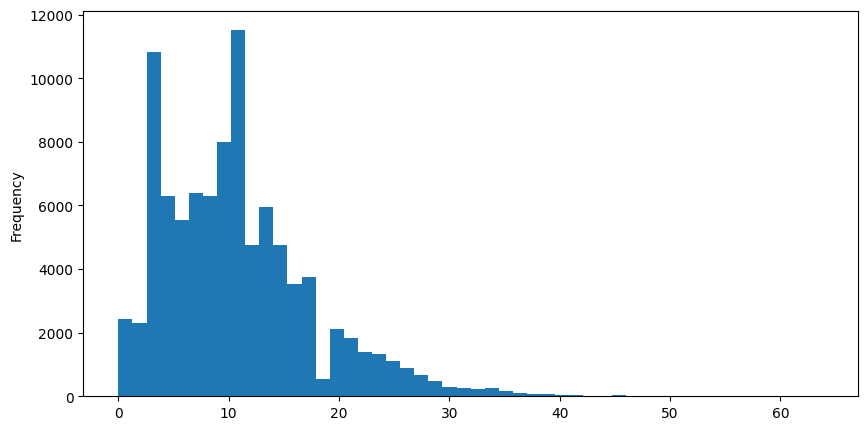

In [ ]:

df['Wind Speed (km/h)'].plot(kind='hist', bins=50, figsize=(10, 5))

Rellenaremos los datos faltantes con el promedio, ya que al revisar su histograma se ven datos dispersos alrededor de todo el rango.

In [ ]:
df2 = df.copy()
df2['Wind Speed (km/h)'] = df2['Wind Speed (km/h)'].fillna(df['Wind Speed (km/h)'].mean())

## Pressure

<Axes: ylabel='Frequency'>

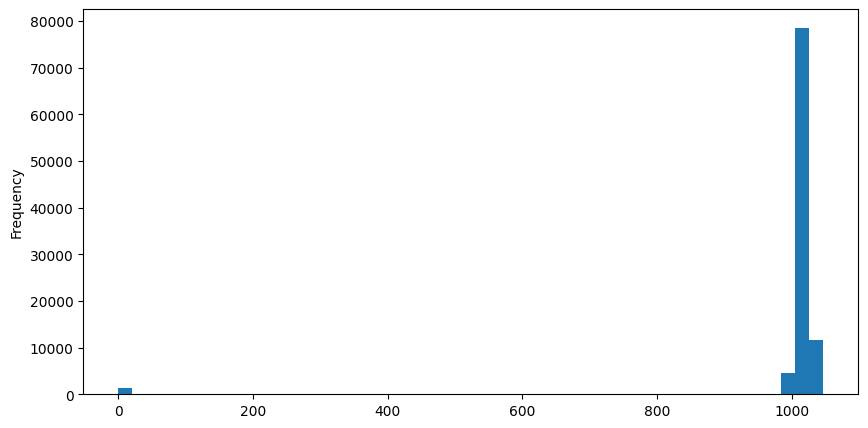

In [ ]:
df2['Pressure (millibars)'].plot(kind='hist', bins=50, figsize=(10, 5))

Para el caso de la presión se usará el valor de la mediana en vez del promedio, ya que al revisar su histograma se aprecia que la mayoría de los datos tienen un valor cercano a 1016 que es cercano al valor típico de la presión atmosférica a nivel del mar: 1013,2 milibars.

In [ ]:
df3 = df2.copy()
df3['Pressure (millibars)'] = df3['Pressure (millibars)'].fillna(df3['Pressure (millibars)'].median())

## Precip Type
Para el caso de 'Precip Type' se observan que toma los valores "rain" y "snow". Según lo investigado, los tipos de precipitaciones pueden ser XXXX, YYYY, ZZZZ, por lo que no podemos asumir con claridad a que corresponde los valores nulos, por tanto, se decide eliminarlos.

In [ ]:
df3['Precip Type'].unique()

array(['rain', nan, 'snow'], dtype=object)

In [ ]:
df4 = df3.copy()
df4['Precip Type'] = df4['Precip Type'].fillna('Unknown')

Al revisar nuevamente los datos nulos, encontramos que todas las columnas fueron corregidas.

In [ ]:
display(Markdown("#### Información de datos nulos por columna"))

display(df4.isnull().sum())

#### Información de datos nulos por columna

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Loud Cover                0
Pressure (millibars)      0
Daily Summary             0
Fecha                     0
dtype: int64

# I.B. Inspección y Gestión de Datos Anómalos

En el mundo del machine learning, es común encontrarse con datos anómalos. Estos pueden ser errores de medición, errores de transcripción, o simplemente valores que no tienen sentido en el contexto de la aplicación. En esta sección, se le pide que inspeccione los datos en busca de anomalías, y que desarrolle una estrategia para tratarlas. Puede ser útil graficar los datos para encontrar anomalías.

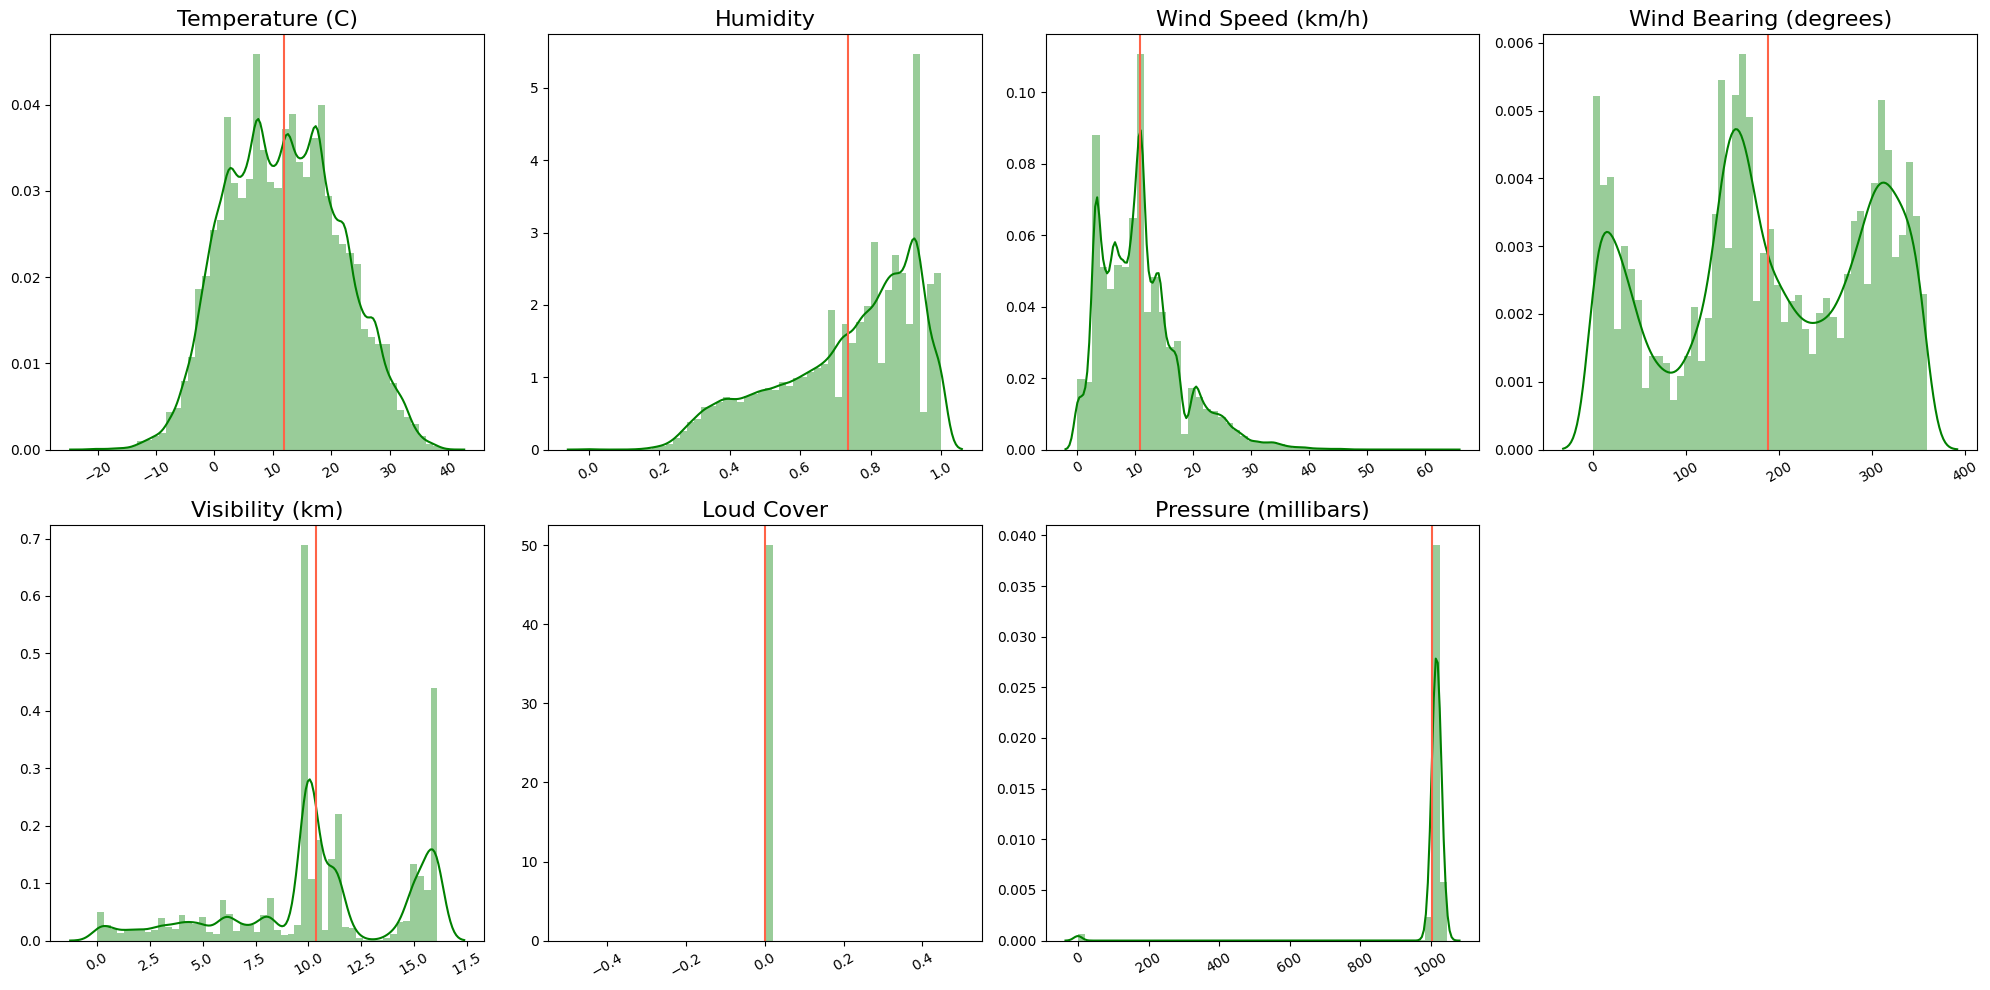

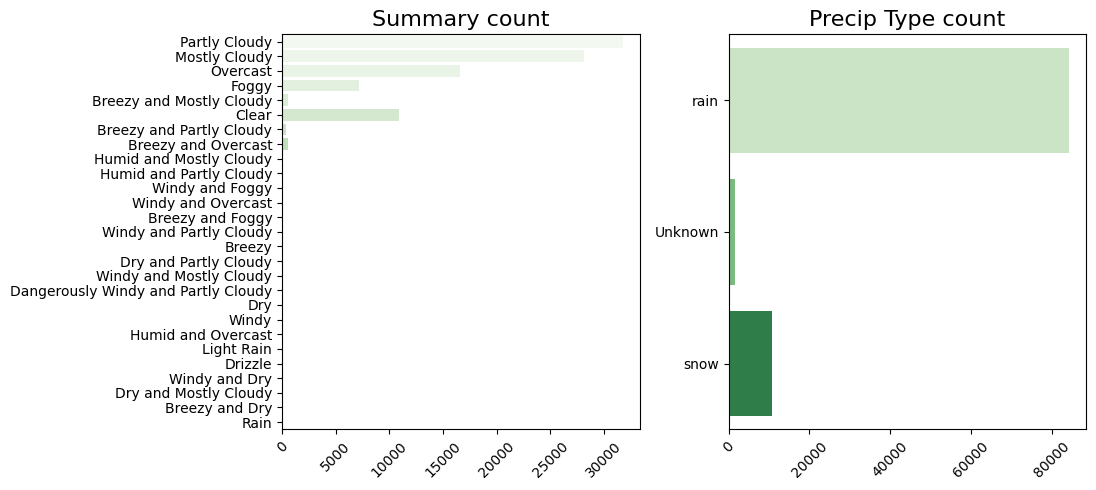

In [ ]:
# Su código aquí
def get_graph(dfr, cols, var_numericas=[], var_categoricas=[], sub_width=5, sub_height=5):

    if len(var_numericas) != 0:

      rows = np.ceil(len(var_numericas) / cols).astype(int)

      plt.figure(figsize=(cols * sub_width, rows * sub_height))

      for index, col_name in enumerate(var_numericas):
          plt.subplot(rows, cols, index + 1)
          g = sns.distplot(dfr[col_name], color="green")
          plt.axvline(np.mean(dfr[col_name]), color='tomato')
          plt.title(col_name, fontsize=16)
          plt.xlabel('')
          plt.ylabel('')
          for item in g.get_xticklabels():
              item.set_rotation(30)
          plt.tight_layout()

    if len(var_categoricas) != 0:

      rows = np.ceil(len(var_categoricas) / cols).astype(int)

      plt.figure(figsize=(cols * sub_width, rows * sub_height))

      for index, col_name in enumerate(var_categoricas):
          plt.subplot(rows, cols, index + 1)
          g = sns.countplot(dfr[col_name], palette="Greens")
          plt.title(col_name + " count", fontsize=16)
          plt.xlabel('')
          plt.ylabel('')
          for item in g.get_xticklabels():
              item.set_rotation(45)
          plt.tight_layout()

get_graph(df4, 4, df4.select_dtypes(include=["float64", "int64"]).columns, ['Summary', 'Precip Type'])

In [ ]:
try:
    pd.to_datetime(df4['Fecha'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    display('No hay errores de formato en la fecha, es seguro convertir el dato desde object a fecha')
    df4['Fecha_'] = pd.to_datetime(df4['Fecha'], format='%Y-%m-%d %H:%M:%S', errors='raise')

except ValueError:
    print('Errores')

display(df4.describe())

'No hay errores de formato en la fecha, es seguro convertir el dato desde object a fecha'

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,0.734899,10.812323,187.509232,10.347325,0.0,1003.254873
std,9.551546,0.195473,6.838214,107.383428,4.192123,0.0,116.879958
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,0.600000,5.989200,116.000000,8.339800,0.0,1011.910000
50%,12.000000,0.780000,10.255700,180.000000,10.046400,0.0,1016.440000
75%,18.838889,0.890000,14.039200,290.000000,14.812000,0.0,1021.070000
max,39.905556,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df4['Summary'].nunique() / df4.shape[0]

0.00027992908463189323

In [ ]:
display(Markdown("#### Columna Summary"))

display(Markdown(f"La cantidad de valores únicos para la columna **Summary** es {str(df4['Summary'].nunique())}"))
display(df4["Summary"].value_counts())

display(Markdown("#### Columna Daily Summary"))

display(Markdown(f"La cantidad de valores únicos para la columna **Daily Summary** es {str(df4['Daily Summary'].nunique())}"))
display(df4["Daily Summary"].value_counts())

display(Markdown("#### Columna Fecha"))
display(Markdown(f"La cantidad de valores únicos para la columna **Fecha** con su formato fecha y hora es  {str(df4['Fecha_'].nunique())}"))
display(Markdown(f"La cantidad de valores únicos para la columna **Fecha** considerando solo la parte fecha es {str(df4['Fecha_'].dt.date.nunique())}"))
display(df4['Fecha_'].dt.date.value_counts())

#### Columna Summary

La cantidad de valores únicos para la columna **Summary** es 27

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

#### Columna Daily Summary

La cantidad de valores únicos para la columna **Daily Summary** es 214

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

#### Columna Fecha

La cantidad de valores únicos para la columna **Fecha** con su formato fecha y hora es  96418

La cantidad de valores únicos para la columna **Fecha** considerando solo la parte fecha es 4018

2010-08-02    48
2013-10-27    25
2011-10-30    25
2006-10-29    25
2008-10-26    25
              ..
2008-03-30    23
2007-03-25    23
2011-03-27    23
2009-03-29    23
2014-07-14    21
Name: Fecha_, Length: 4018, dtype: int64

A continuación se analizan los datos de cada uno de los gráficos.
- **Summary:** Columna de texto con 27 registros diferentes, donde el que más se repite es el "Partly Cloudy" 31733 y los que menos aparece son "Windy and Dry ","Breezy and Dry", "Dangerously Windy and Partly Cloudy" con una sóla aparición cada uno. Al revisar cada uno de los registros posibles, no se observan errores de transcripción o de sentido.
- **Precip Type:** Puede tener 2 valores: rain y snow, además de Unknow para los valores desconocidos. No se observan errores de transcripción.
- **Temperature:** Se observan valores dentro de lo esperado para una ciudad europea.
- **Humidity:** Se observa que los valores varían dentro de lo esperado entre 0 y 100%.
- **Wind Speed:** Valores dentro de rangos  normales.
- **Wind Bearing:** Valores dentro de rangos de grados normales.
- **Visibility:** La visibilidad puede ir entre 0 a 50 km por tanto todos los valores están dentro del rango. Fuente [Tiempo.com](https://www.tiempo.com/ram/1041/meteorologa-viila-visibilidad-y-los-factores-meteorolgicos-que-influyen-en-ella/).
- **Loud Cover:** Se una columna con valor constante de cero. Por lo que no será útil para el modelo. **Tratamiento:** Se eliminará la columna.
- **Pressure:** Los valores de presión registrados varían entre 0 y 1046 mbar. Estos datos con valor cero son datos anómalos, ya que salen de rangos normales de medición, como ejemplo: la presión a nivel del mar es de 1013,25 mbar y a 5600 metros la presión promedio es de 500 mbar. **Tratamiento**: Se eliminarán estos registros.
- **Daily Summary:** Son datos de texto que categorizan con 214 opciones cada registro, donde el que más se repite es "Mostly cloudy throughout the day." con 20085 apariciones y el que menos es "Foggy starting overnight continuing until morning and breezy in the afternoon." con 23 apariciones. No se detectaron errores de transcripción.
- **Fecha:** Las fechas vienen en formato 'yyyy-mm-dd hh:mm:ss' con 4018 fechas únicas, donde en promedio cada fecha tiene 23 muestras a diferentes horas. Con fechas que van desde el 2006 al 2016.

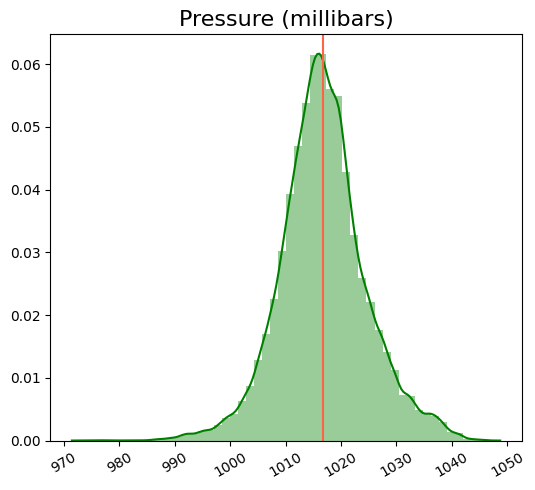

In [ ]:
# Eliminación de columna Loud Cover
df5 = df4.copy()
df5 = df5.drop('Loud Cover', axis=1)
df5 = df5.drop('Fecha_', axis=1)

# Eliminación de registros con valor cero de Pressure.
df6 = df5.copy()
df6 = df6.drop(df6[df6['Pressure (millibars)']==0.0].index)

get_graph(df6, 4, ['Pressure (millibars)'])

# Revisión de fechas

# I.C. Inspección y Gestión de Datos Categóricos

Seleccione los datos categóricos que le parezcan relevantes para el modelo y transformelos a variables dummies. Justifique su elección y el por qué dejó fuera otras variables categóricas.

Las variables categóricas de la base de datos son:

* Summary
* Daily Summary
* Precip Type

La temperatura del aire influye en el tipo de precipitación. Por tanto, podemos usar el tipo de precipitación para lograr predicir la temperatura.

El estado del tiempo diario y al momento de la muestra afectan directamente al valor de temperatura. Por ejemplo, habrá una menor temperatura en un día nublado que en uno soleado.

Se categorizarán las 3 columnas, y se probará con varias alternativas el efecto de las variables categóricas Daily Summary y Summary.



In [ ]:
df7 = df6.copy()
df7['Precip Type'] = df7['Precip Type'].astype('category').cat.codes
encoded_summary = pd.get_dummies(df7['Summary'])
encoded_daily_summary = pd.get_dummies(df7['Daily Summary'])
df7 = df7.join(encoded_summary)
df7 = df7.join(encoded_daily_summary)
df7 = df7.drop(columns=['Daily Summary', 'Summary'])

# II. Selección de Variables y Atributos Temporales

# II.A. Selección de Variables

Seleccione las variables que utilizará para el modelo de regresión. Justifique su elección y el por qué no utiliza otras variables.

Se realizarán varios modelos de predicción. Dependiendo del modelo se usarán más o menos columnas. Se usarán todas las columnas del dataframe inicial a excepción de **Loud Cover**.


In [ ]:
# Loud cover fue eliminada en la Inspección y Gestión de Datos Anómalos.

# II.B. Creación de Variables Temporales

En un modelo de regresión, es importante considerar la fecha como un atributo temporal. Elija y justifique la elección o no elección de variables temporales.

Para esto, se proporciona un código base para el procesamiento de la fecha, será útil en el caso de que se quiera usar algún atributo de la fecha; como por ejemplo el año, mes o día. Debe transformar la columna 'fecha' a un fomato de tiempo de pandas, para eso utilice la función pd.to_datetime(). Luego puede extraer el año, mes o día con las siguientes funciones:

df['Fecha'].dt.year  &ensp; | &ensp;  extrae el año </br>
df['Fecha'].dt.month   &ensp; | &ensp;   extrae el mes </br>
df['Fecha'].dt.day     &ensp; | &ensp;   extrae el día </br>
df['Fecha'].dt.hour    &ensp; | &ensp;   extrae la hora

Se crearán los siguientes tipos variables temporales, las que se usarán en los diferentes modelos a probar:

1. Season: Equivalente a la estación del año.
2. Año: Parte año de la fecha.
3. Mes: Parte mes de la fecha
4. Día: Parte día de la fecha.
5. Hora: Parte hora de la fecha.
    
Se define funcion python que realiza definición de las estaciones del año.

In [ ]:
# Definición de función para transformar fecha a estación del año
def season_of_date(date):
    if (date >= 321 and date <= 620):
        s = int(1) #spring
    elif (date >= 621 and date <= 920):
        s = int(2) #summer
    elif (date >= 921 and date <= 1220):
        s = int(3) #fall
    else:
        s = int(4) #winter
    return s

In [ ]:
# Transformación de columna Fecha a datetime y separación en columnas por año, mes, día y hora.

df10 = df7.copy()
df10['Fecha'] = pd.to_datetime(df10.Fecha)
df10['mes'] = df10['Fecha'].dt.strftime('%m')
df10['anio'] = df10['Fecha'].dt.strftime('%Y')
df10['dia'] = df10['Fecha'].dt.strftime('%d')
df10['hora'] = df10['Fecha'].dt.strftime('%H')
df10 = df10.drop('Fecha', axis=1)


In [ ]:

df8 = df7.copy()
df8['Fecha'] = pd.to_datetime(df8.Fecha)
#df2['Fecha2'] = df2['Fecha'].dt.strftime('%Y%m%d')
df8['Fecha2'] = df8['Fecha'].dt.strftime('%m%d')
df8['Fecha2']=pd.to_numeric(df8['Fecha2'])
df8['SEASON'] = df8['Fecha2'].apply(season_of_date)
df8['hora'] = df8['Fecha'].dt.strftime('%H')
df8['mes'] = df8['Fecha'].dt.strftime('%m')
#se elimina columna de fecha
df8 = df8.drop('Fecha', axis=1)
df8 = df8.drop('Fecha2', axis=1)


# III. Desarrolle y Evalúe un Modelo de Regresión

Se se solicita que se realice un modelo de regresión lineal para predecir la temperatura en base a los datos entregados. Para esto, debe realizar un modelo de regresión, puede usar cualquiera de los modelos importados en el apartado 'D.', se prohíble el uso de modelos basado en ensamblados o redes neuronales profundas. Debe testear el modelo con al menos 20% del set de datos. Debe calcular el error absoluto medio (MAE) y el coeficiente de determinación (R2). Qué puede decir de los resultados obtenidos? **Se solicita un error absoluto medio menor a 3 grados celcius, elija otra métrica adicional e interprete los resultados.** Precaución: No testear sobre los datos de entrenamiento.

In [ ]:
df9 = df8.iloc[:, 0:6]
df9['Season'] = df8['SEASON']
df9['hora'] = df8['hora']
df9['mes'] = df8['mes']
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95167 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Precip Type             95167 non-null  int8   
 1   Temperature (C)         95167 non-null  float64
 2   Humidity                95167 non-null  float64
 3   Wind Speed (km/h)       95167 non-null  float64
 4   Wind Bearing (degrees)  95167 non-null  float64
 5   Visibility (km)         95167 non-null  float64
 6   Season                  95167 non-null  int64  
 7   hora                    95167 non-null  object 
 8   mes                     95167 non-null  object 
dtypes: float64(5), int64(1), int8(1), object(2)
memory usage: 8.6+ MB


In [ ]:
# Creando un Set de Datos de Entrenamiento y un Set de Datos de Prueba

# Modelo 1 todas las columnas incluyendo todas las categoricas

X1 = df8.drop('Temperature (C)', axis=1)
y1 = df8['Temperature (C)']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#print(f"Dimension de X_train: {X_train.shape}")
#print(f"Dimension de X_test: {X_test.shape}")
#print(f"Dimension de y_train: {y_train.shape}")
#print(f"Dimension de y_test: {y_test.shape}")

scaler = MinMaxScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [ ]:
linear_model1 = LinearRegression()
linear_model1.fit(X1_train, y1_train)

# Predicción
y1_pred = linear_model1.predict(X1_test)

def report_scores(vector_pred, vector_test):
    rmse = np.sqrt(mean_squared_error(vector_test, vector_pred)).round(2)
    r2 = r2_score(vector_test, vector_pred).round(2)
    mae = mean_absolute_error(vector_test, vector_pred).round(2)
    mape = mean_absolute_percentage_error(vector_test, vector_pred).round(2)


    return (rmse, r2, mae, mape)

rmse_1, r2_1, mae_1, mape_1 = report_scores(y1_pred, y1_test)

# aporte de los coeficientes (parámetros) a la predicción
#importance1 = linear_model1.coef_
# summarize feature importance
#for i, v in enumerate(importance1):
#    print('Feature: %s, Score: %.5f' % (X1.columns[i], v))

In [ ]:
# Modelo 2 todas las columnas sin las categoricas Summary y Daily Summary

X2 = df9.drop('Temperature (C)', axis=1)
y2 = df9['Temperature (C)']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

#print(f"Dimension de X_train: {X_train.shape}")
#print(f"Dimension de X_test: {X_test.shape}")
#print(f"Dimension de y_train: {y_train.shape}")
#print(f"Dimension de y_test: {y_test.shape}")

scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [ ]:
linear_model2 = LinearRegression()
linear_model2.fit(X2_train, y2_train)

# Predicción
y2_pred = linear_model2.predict(X2_test)

rmse_2, r2_2, mae_2, mape_2 = report_scores(y2_pred, y2_test)

# aporte de los coeficientes (parámetros) a la predicción
#importance2 = linear_model2.coef_
# summarize feature importance
#for i, v in enumerate(importance2):
#    print('Feature: %s, Score: %.5f' % (X2.columns[i], v))

In [ ]:
# Modelo 3 fecha separada

X3 = df10.drop('Temperature (C)', axis=1)
y3 = df10['Temperature (C)']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

#print(f"Dimension de X_train: {X_train.shape}")
#print(f"Dimension de X_test: {X_test.shape}")
#print(f"Dimension de y_train: {y_train.shape}")
#print(f"Dimension de y_test: {y_test.shape}")

scaler = MinMaxScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

In [ ]:
linear_model3 = LinearRegression()
linear_model3.fit(X3_train, y3_train)

# Predicción
y3_pred = linear_model3.predict(X3_test)

rmse_3, r2_3, mae_3, mape_3 = report_scores(y3_pred, y3_test)

# aporte de los coeficientes (parámetros) a la predicción
# importance3 = linear_model3.coef_
# summarize feature importance
#for i, v in enumerate(importance3):
#    print('Feature: %s, Score: %.5f' % (X3.columns[i], v))

In [ ]:
display(Markdown("**Comparación de métricas**"))
list_of_metrics = []


metrics_1 = pd.Series({
               'RMSE': rmse_1,
               'MAE': mae_1,
               'R2': r2_1,
               'MAPE' :mape_1,
               })
list_of_metrics.append(metrics_1)

metrics_2 = pd.Series({
               'RMSE': rmse_2,
               'MAE': mae_2,
               'R2': r2_2,
               'MAPE' :mape_2,
               })
list_of_metrics.append(metrics_2)

metrics_3 = pd.Series({
               'RMSE': rmse_3,
               'MAE': mae_3,
               'R2': r2_3,
               'MAPE' :mape_3,
               })


list_of_metrics.append(metrics_3)


display(pd.DataFrame(list_of_metrics, index = ["Modelo 1", "Modelo 2", "Modelo 3"]))

**Comparación de métricas**

,RMSE,MAE,R2,MAPE
Modelo 1,4.89,3.89,0.74,4.872031e+13
Modelo 2,5.43,4.37,0.68,4.493689e+13
Modelo 3,5.26,4.20,0.70,5.374367e+13


# IV. Reflexión Final

Realice una reflexión final sobre el trabajo realizado. ¿Qué puede decir de los resultados obtenidos? ¿Qué mejoras se podrían realizar? ¿Qué aprendió en esta actividad? ¿Considera que le será útil en su futuro profesional? ¿Por qué?

Para la predicción de la temperatura de una ciudad europea se generaron 3 modelos de regresión lineal, tomando diferentes parámetros climáticos para el entrenamiento.
A continuación un detalle general de los parámetro que se utilizaron en cada modelo:

- **Modelo 1:** Se consideraron todos los parámetros del dataset incluyendo los categóricos, se eliminó la fecha, pero a partir de esta se crearon nuevas variables: season (estaciones del año), hora y mes.
- **Modelo 2:** Se consideran los mismos parámetros del modelo 1 a excepción de las variables categóricas Summary y Daily Summary.
- **Modelo 3:** Se consideran los mismos parámetros del modelo 1 a excepción de la variable generada season.

Los resultados obtenidos se presentan en la siguiente tabla ordenados de acuerdo a su precisión.


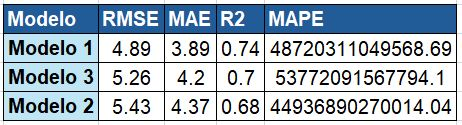

Se concluye que utilizando todos los parámetros del dataset a excepción de Loud Cover y considerando las nuevas variables creadas a partir de la fecha, se logró obtener un valor bastante aceptable en el modelo 1, obteniendo un r2 de 0.74 cercano a 1 y un MAE de 3.89, qué quiere decir la diferencia en grados en los errores.
Como mejoras, se podría enriquecer el dataset utilizando otras variables que afecten directamente a la temperatura, como se hace en el estudio de Sarricolea y Aravena (2010), donde toman algunas variables como:


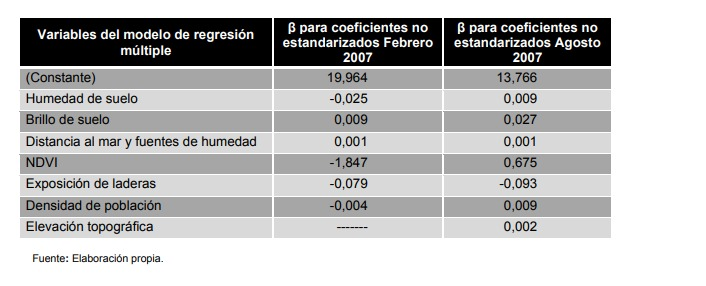

Dentro del trabajo, concluimos que con las librerías disponibles aplicar regresión lineal está bastante estandarizado, por lo que el valor agregado no está en este punto, si no que en como elegir y trabajar bien las variables a ingresar en el modelo, para poder obtener una mejor predicción, por lo cual se debe estudiar bien el dataset y entender el tema que se quiere trabajar, para poder seleccionar las variables más adecuadas.
Creemos que en la actualidad en Chile, aún no se ha aplicado en muchas industrias estas metodologías, por lo que sí logramos tener un modelo de alguna temática vendible, sería un punto bastante interesante para poder realizar un emprendimiento.

# Referencia:

Sarricolea, P., & Aravena, H. R. (2010). Análisis de los factores condicionantes sobre las temperaturas de emisión superficial en el área metropolitana de Valparaíso, Chile. ACE: Architecture, City And Environment, 5(13), 79-96. https://doi.org/10.5821/ace.v5i14.2507
